# Molecular Dynamics Coursework

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

The task is a straightforward (!) continuation of the final part of the lab 2 worksheet, and is based on [the same paper as used there](http://dx.doi.org/10.1021/jp046158d).

## Water

Take the potential given for *multiple* water molecules

$$
\begin{align}
  V(\vec{r}) & = \sum_{k=1}^N \left\{ \sum_{l = 1}^2 D_0 \left[ 1 - e^{\alpha \Delta r_{OH_{l_k}}} \right]^2 + \frac{1}{2} k_{\theta} \Delta r_{HH_k}^2 + k_{r \theta} \Delta r_{HH_k} \left( \Delta r_{OH_{1_k}} + \Delta r_{OH_{2_k}} \right) + k_{rr} \Delta r_{OH_{1_k}} \Delta r_{OH_{2_k}} \right\} + \\ & \quad \sum_{i>j} \left( \frac{e_i e_j}{4 \pi e_0 r_{ij}} + 4 \epsilon_{ij} \left[ \left( \frac{\sigma_{ij}}{r_{ij}} \right)^{12} - \left( \frac{\sigma_{ij}}{r_{ij}} \right)^6 \right] \right).
\end{align}
$$

Here $k$ sums over the different water *molecules*, of which there are $N$. The first term corresponds to the forces internal to any one individual molecule. The $i, j$ indices sum over all *atoms*, and correspond to the forces coupling the atoms in different molecules.

From the lab 2 sheet, we have that the forces within the molecule on the appropriate atoms are, eg,

$$
\begin{align}
  \vec{F}_{O} & = - \frac{\partial V}{\partial \vec{r}_O} \\
  & = - \left\{ -2 D_0 \sum_{l=1}^2 \left[ 1 - e^{\alpha \Delta r_{OH_l}} \right] \frac{\partial \Delta r_{OH_l}} {\partial \vec{r}_O} \alpha e^{\alpha \Delta r_{OH_l}} + \right. \\ & \qquad \left. k_{r \theta} \Delta r_{HH} \left( \frac{\partial \Delta r_{OH_1}}{\partial \vec{r}_O} + \frac{\partial \Delta r_{OH_2}}{\partial \vec{r}_O} \right) + \right. \\ & \qquad\left. k_{rr} \left( \frac{\partial \Delta r_{OH_1}}{\partial \vec{r}_O}  \Delta r_{OH_2} + \Delta r_{OH_1} \frac{\partial \Delta r_{OH_2}}{\partial \vec{r}_O} \right) \right\}, \\
  \vec{F}_{H_1} & = -\left\{  -2 D_0 \left[ 1 - e^{\alpha \Delta r_{OH_1}} \right] \frac{\partial \Delta r_{OH_l}}{\partial \vec{r}_{H_1}}  \alpha e^{\alpha \Delta r_{OH_1}} + \right. \\& \qquad \left. k_{\theta} \Delta r_{HH} \frac{\partial \Delta r_{HH}}{\partial \vec{r}_{H_1}} + k_{r \theta} \left[ \frac{\partial \Delta r_{HH}}{\partial \vec{r}_{H_1}} \left( \Delta r_{OH_1} + \Delta r_{OH_2} \right) + \Delta r_{HH} \frac{\partial r_{OH_1}}{\partial \vec{r}_{H_1}} \right] + \right. \\ & \qquad \left. k_{rr} \Delta r_{OH_2} \frac{\partial \Delta r_{OH_1}}{\partial \vec{r}_{H_1}} \right\}
\end{align}
$$

The total force of any atom in addition picks up a term from the Lennard-Jones interaction with all other atoms, with all atoms intereacting through the electronegativities $e_i$, and the oxygen atoms interacting through the Lennard-Jones potential, leading to the additional force on atom $j$ of

$$
\begin{equation}
  \vec{F}_j = \sum_{i>j} \left\{-\frac{e_i e_j}{4 \pi e_0 r_{ij}^3}  + 24 \frac{\epsilon_{ij}}{r_{ij}^2} \left[ 2 \left( \frac{\sigma_{ij}}{r_{ij}} \right)^{12} - \left( \frac{\sigma_{ij}}{r_{ij}} \right)^6  \right] \right\} \left( \vec{r}_i - \vec{r}_j \right).
\end{equation}
$$

The definitions of the terms are the same as in lab 2: $\Delta r_{OH_l} = r_{OH_l} - r_{OH_{\text{eq}}}$ is the stretch in the distance between the oxygen atom and the $l^{\text{th}}$ hydrogen atom $r_{OH_l}$ and its equilibrium value, and $\Delta r_{HH} = r_{HH_l} - r_{HH_{\text{eq}}}$ is the stretch in the distance between the hydrogen atoms. The parameter values are

1. $D_0 = 101.9188$ kcal/mol.
2. $\alpha = 2.567$ $Å^{-1}$
3. $k_{\theta} = 328.645606$ kcal/mol/$Å^2$
4. $k_{r \theta} = -211.4672$ kcal/mol/$Å^2$
5. $k_{rr} = 111.70765$ kcal/mol/$Å^2$
6. $r_{OH_{\text{eq}}} = 1Å$
7. $r_{HH_{\text{eq}}} = 1.633Å$
8. $e_H = 0.41 e_0$
9. $e_O = -0.82 e_0$
10. $\sigma_{OO} = 3.166Å$
11. $\epsilon_{OO} = 0.1554$ kcal/mol
12. $\epsilon_{OH} = \epsilon_{HH} = 0$ kcal/mol
13. $e_0 = 1$ (unit charge).

A cut-off radius $R_c = 14Å$ is enforced; the additional interaction term leading to the force $\vec{F}_j$ is only calculated inside this radius.

In [2]:
ct = {'D0':101.9188,
      'alpha':2.567,
      'kt':328.645606,
      'krt':-211.4672,
      'krr':11.70765,
      'rOHeq':1.0,
      'rHHeq':1.633,
      'eH':0.41,
      'eO':-0.82,
      'sig':3.166,
      'eps':0.1554,
      'rc':14.0,
      'boxSize':35.0}

### Set up

Consider a periodic box setup as in lab 1. Each box will have $\vec{x} \in [0, 35Å]^3$.

Put eight water molecules in the box. The locations of the oxygen atoms should be drawn "randomly" from a uniform distribution in $[0, 35]$ with random seed set to `100`. 

The hydrogen atoms should be located at

$$
\begin{equation}
  \vec{r}_{H_{\pm_k}} = \vec{r}_{O_k} + [ \pm 0.8, 0.6, 0].
\end{equation}
$$

Plot the initial locations of the atoms. Starting from this configuration, minimize the energy (allowing the locations of the oxygen atoms to vary, but maintaining the offset of the hydrogen atoms within the molecule as fixed) and plot the resulting location of the atoms.

In [3]:
%matplotlib inline
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)
from scipy.optimize import minimize

In [24]:
mass = np.array([15.999, 1.008, 1.008])
rd = np.random.RandomState(100)
pos = np.zeros((8, 3, 3))
pos[:, 0, :] = (rd.rand(8,3))* 35.0
pos[:, 1, :] = pos[:, 0, :] + np.array([0.8, 0.6, 0.0])
pos[:, 2, :] = pos[:, 0, :] + np.array([-0.8, 0.6, 0.0])

The positions of the particles are taken from an uniform distribution seeded at $100$ and scaled to a $[0, 35]$ domain. Initially it was tried to center the domain about $0$ but this produced problems in computing the $L_2$ norm between one of the $H$ atoms and one of the $O$ atoms, this issue most probably apeared due to an approximation made in the floating point approcimation.

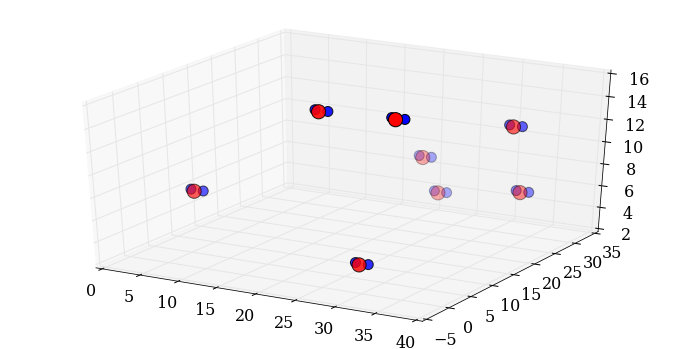

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#for i in range(np.shape(pos)[0]):
ax.scatter3D(pos[:, 0, 0], pos[:, 0, 1], pos[:, 0, 2], c='r', marker='o', s=200)
ax.scatter3D(pos[:, 1:, 0], pos[:, 1:, 1], pos[:, 1:, 2], c='b', marker='o', s=100)
plt.show()

In [ ]:
def Ven():
    pass

In [38]:
def accel_intra_molecular(x, mass, ct):
    """
    Compute the accelerations given the locations for the Lennard-Jones potential.
    
    Parameters
    ----------
    
    x : array of float
        Particle positions
    mass : array of float
        Particle masses
        
    Returns
    -------
    
    a : array of float
        Particle accelerations
    """
    
    #ndim, N = x.shape
    #assert(N==3)
    
    D0 = ct['D0']
    alpha = ct['alpha']
    kt = ct['kt']
    krt = ct['krt']
    krr = ct['krr']
    r_OH_eq = ct['rOHeq']
    r_HH_eq = ct['rHHeq']
    
    r_O = x[0, :]
    r_H_1 = x[1, :]
    r_H_2 = x[2, :]
    diff_r_OH_1 = np.linalg.norm(r_O - r_H_1,2)
    diff_r_OH_2 = np.linalg.norm(r_O - r_H_2,2)
    diff_r_HH = np.linalg.norm(r_H_1 - r_H_2,2)
    dr_OH_1 = np.abs(diff_r_OH_1 - r_OH_eq)
    dr_OH_2 = np.abs(diff_r_OH_2 - r_OH_eq)
    dr_HH = np.abs(diff_r_HH - r_HH_eq)
    
    # Derivatives
    d_dr_OH_1_dO = 1.0/(dr_OH_1*diff_r_OH_1)*(diff_r_OH_1 - r_OH_eq)*(r_O - r_H_1)
    d_dr_OH_2_dO = 1.0/(dr_OH_2*diff_r_OH_2)*(diff_r_OH_2 - r_OH_eq)*(r_O - r_H_2)
    d_dr_OH_1_dH1 = -d_dr_OH_1_dO
    d_dr_OH_2_dH2 = -d_dr_OH_2_dO
    d_dr_HH_dH1 = 1.0/(dr_HH*diff_r_HH)*(diff_r_HH - r_HH_eq)*(r_H_1 - r_H_2)
    d_dr_HH_dH2 = -d_dr_HH_dH1
    
    # Forces
    F = np.zeros_like(x)
    # Oxygen
    F[0,:] = (2.0*D0*alpha*((1.0-np.exp(alpha*dr_OH_1))*np.exp(alpha*dr_OH_1)*d_dr_OH_1_dO\
                            +(1.0-np.exp(alpha*dr_OH_2))*np.exp(alpha*dr_OH_2)*d_dr_OH_2_dO)-\
              krt*dr_HH*(d_dr_OH_1_dO+d_dr_OH_2_dO)-\
              krr*(d_dr_OH_1_dO*dr_OH_2+dr_OH_1*d_dr_OH_2_dO))/mass[0]
    # Hydrogen(s)
    F[1,:] = (2.0*D0*alpha*(1.0-np.exp(alpha*dr_OH_1))*np.exp(alpha*dr_OH_1)*d_dr_OH_1_dH1-\
              kt*dr_HH*d_dr_HH_dH1-\
              krt*(d_dr_HH_dH1*(dr_OH_1+dr_OH_2)+dr_HH*d_dr_OH_1_dH1)-\
              krr*d_dr_OH_1_dH1*dr_OH_2)/mass[1]
    F[2,:] = (2.0*D0*alpha*(1.0-np.exp(alpha*dr_OH_2))*np.exp(alpha*dr_OH_2)*d_dr_OH_2_dH2-\
              kt*dr_HH*d_dr_HH_dH2-\
              krt*(d_dr_HH_dH2*(dr_OH_1+dr_OH_2)+dr_HH*d_dr_OH_2_dH2)-\
              krr*d_dr_OH_2_dH2*dr_OH_1)/mass[2]
                
    return F

In [34]:
def accel_inter_molecular(pos, mass, ct):
    a = np.zeros_like(pos)
    n = np.shape(pos)[0]
    local_LJ = 0
    for i in np.arange(n*3):
        for j in np.arange((int(i/3) + 1) * 3, n*3):
            ox = 0
            diff = pos[int(i/3), i%3, :] - pos[int(j/3), j%3, :]
            if i%3 == 0:
                ei = ct['eO']
                ox += 1
            else:
                ei = ct['eH']
            if j%3 == 0:
                ej = ct['eO']
                ox += 1
            else:
                ej = ct['eH']
            if ox == 2:
                local_LJ = dLJ(diff, ct)
            a[int(i/3), i%3, :] += (-ei*ej/4/np.pi/np.linalg.norm(diff) + local_LJ) * diff / mass[i%3]
            a[int(j/3), j%3, :] -= (-ei*ej/4/np.pi/np.linalg.norm(diff) + local_LJ) * diff / mass[j%3]
    return a

In [35]:
@jit
def dLJ(pos_diff, ct):
    # Contains three cases: closer as is, closer to the left, closer to the right
    cases = np.array([0, -35.0, 35.0])
    for n in range(len(pos_diff)):
        # Add to the directions of interest to see if particles are closer over
        # the periodic boundaries
        index = np.argmin(np.abs(pos_diff[n] + cases))
        pos_diff[n] += cases[index]
    r = np.linalg.norm(pos_diff)
    #print r
    if r < ct['rc']:
        return 24 * (2 * (ct['sig']/r)**(14) - (ct['sig']/r)**(8)) / ct['eps']
    else:
        return 0.0

In [36]:
def accel(pos, mass, ct):
    a_inner = np.zeros_like(pos)
    a_outer = np.zeros_like(pos)
    N = np.shape(pos)[0]
    for i in np.arange(N):
        a_inner[i, :, :] = accel_intra_molecular(pos[i, :, :], mass, ct)
    a_outer = accel_inter_molecular(pos, mass, ct)
    return a_outer + a_inner

In [39]:
a = accel(pos, mass, ct)
print a

(array([[[  4.07390421e-02,  -2.10463454e-02,   1.66345653e-04],
        [ -6.79987449e-04,   4.00776693e-03,   2.95634079e-04],
        [ -8.19393851e-04,   3.82761942e-03,   2.45180180e-04]],

       [[ -6.30232262e-03,   3.93398966e-01,   4.96740726e-02],
        [ -1.13558202e+00,   4.00864269e+00,   8.46892881e-01],
        [ -8.36018239e-01,   4.00867864e+00,   8.46827010e-01]],

       [[ -2.91344060e+00,   2.38329222e+00,   2.25152183e+00],
        [  3.60571272e-01,  -2.47367169e+00,   2.75439087e-01],
        [  5.69531604e-01,  -2.47374470e+00,   2.74717991e-01]],

       [[  1.01096063e+00,  -6.95114654e-01,  -7.54311327e-01],
        [  1.22784389e+01,  -1.46847493e+01,  -1.19547017e+01],
        [  1.98550651e+01,  -1.46851444e+01,  -1.19542513e+01]],

       [[  3.13619079e-02,   3.01687289e-03,  -6.16410747e-03],
        [  9.19629139e-01,   3.80632311e-01,  -7.21748011e-02],
        [  9.89557811e-01,   3.80550067e-01,  -7.21226920e-02]],

       [[ -2.91686637e-01,   

In [11]:
@jit
def part_reset(pos):
    """
    Function to reset particle positions based on the position of the oxygen atom 
    because the interactions between these atoms affect the L-J potential.
    """
    assert np.shape(pos) == (8, 3, 3),\
    "Please check the position matrix to be of an acceptable shape (see 'sim' function)."
    over = pos[:, 0, :] > 35.0
    under = pos[:, 0, :] < 0.0
    for i in range(3):
        pos[:, i, :][over] -= 35.0
        pos[:, i, :][under] += 35.0
    return pos

In [12]:
@jit
def sim(init, mass, dt, steps, ct):
    """
    
    The matrix containing the initial positions ('init') should be of shape 8, 3, 3,
    with the first number giving the no of molecules, the second: the number of atoms
    in a molcule and the third: the number of dimensions
    """
    cpos = init.copy()
    all_pos = np.zeros((steps+1, cpos.shape[0], cpos.shape[1], cpos.shape[2]))
    all_pos[0, :, :, :] = cpos
    cvel = np.zeros_like(cpos)
    cacc = np.zeros_like(cpos)
    time = np.arange(0.0, steps*dt, dt)
    time = np.append(time, steps*dt)
    T = np.zeros_like(time)
    T[0] = temperature(cvel, boxSize)
    for i in np.arange(1, steps+1):
        cpos, cvel, cacc = vv(cpos, cvel, cacc, mass, dt, ct)
        all_pos[i, :, :] = cpos[:]
        T[i] = temperature(cvel, boxSize)
        #print "pos of first two are \n{}\n{}\n Temperature is {}\n".format(cpos[0,:], cpos[1, :], T[i])
    return all_pos, time, T

In [13]:
@jit
def temperature(vel, boxSize):
    N = vel.shape[0]
    energy = np.sum(np.einsum('ij,ji->i', vel, vel.T))
    return boxSize**2 * energy / float(3 * N)

In [14]:
@jit
def vv(pos, vel, acc, mass, dt, ct):
    N, dim = np.shape(pos)
    pos_new = pos + vel * dt + 0.5 * dt**2 * acc
    pos_new = part_reset(pos_new)
    vel_star = vel + 0.5 * dt * acc
    acc_new = accel(pos_new, mass, ct)
    vel_new = vel_star + 0.5 * dt * acc_new
    return pos_new, vel_new, acc_new

In [15]:
accel(pos, mass, ct)
pos

array([[[ 19.01917296,   9.74292848,  14.85811568],
        [ 19.81917296,  10.34292848,  14.85811568],
        [ 18.21917296,  10.34292848,  14.85811568]],

       [[ 29.56716463,   0.16515997,   4.25491923],
        [ 30.36716463,   0.76515997,   4.25491923],
        [ 28.76716463,   0.76515997,   4.25491923]],

       [[ 23.47621797,  28.90484643,   4.78473064],
        [ 24.27621797,  29.50484643,   4.78473064],
        [ 22.67621797,  29.50484643,   4.78473064]],

       [[ 20.12826653,  31.1962684 ,   7.32207427],
        [ 20.92826653,  31.7962684 ,   7.32207427],
        [ 19.32826653,  31.7962684 ,   7.32207427]],

       [[  6.48648768,   3.79319117,   7.68941224],
        [  7.28648768,   4.39319117,   7.68941224],
        [  5.68648768,   4.39319117,   7.68941224]],

       [[ 34.25183246,  28.40891022,   6.01793545],
        [ 35.05183246,  29.00891022,   6.01793545],
        [ 33.45183246,  29.00891022,   6.01793545]],

       [[ 28.56786621,   9.59258115,  15.10964643],


In [16]:
a=accel(pos, mass, ct)

### Evolution

Using a timestep $dt = 0.001$, evolve forward to $T = 5$ and plot the temperature as a function of time. [Note: when testing, you should only use a few timesteps. As a hint, the temperature should remain ${\cal O}(1)$ and oscillate $\sim 10$ times before $T=1$].